In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sentiment_data = pd.read_csv("sentiment-analysis.csv", skipfooter=2, engine='python')
sentiment_data


,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."
...,...
91,"""Just had the most amazing vacation! I can't w..."
92,"""The food at this restaurant was awful. Never ..."
93,"""I can't stop listening to this song. It's my ..."
94,"""Their website is so confusing and poorly desi..."


In [3]:
sentiment_data.isnull().sum()

Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score    0
dtype: int64

In [4]:
sentiment_data.columns

Index(['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], dtype='object')

In [5]:
sentiment_split = sentiment_data.iloc[:, 0].str.split(',', n=6, expand=True)

In [6]:
sentiment_split = sentiment_split.reset_index(drop=True)

In [7]:
sentiment_split.columns = ['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']
sentiment_split['Text'] = sentiment_split['Text'].str.strip('" ')
sentiment_split['Sentiment'] = sentiment_split['Sentiment'].str.strip('" ').str.lower()

In [8]:
sentiment_split[['Text', 'Sentiment']].head()

,Text,Sentiment
0,I love this product!,positive
1,The service was terrible.,negative
2,This movie is amazing!,positive
3,I'm so disappointed with their customer support.,negative
4,Just had the best meal of my life!,positive


In [9]:
sentiment_split['Sentiment'].value_counts()

Sentiment
positive    53
negative    43
Name: count, dtype: int64

In [10]:
sentiment_split

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
...,...,...,...,...,...,...,...
91,Just had the most amazing vacation! I can't wa...,positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93
92,The food at this restaurant was awful. Never g...,negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55
93,I can't stop listening to this song. It's my n...,positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91
94,Their website is so confusing and poorly desig...,negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
X = sentiment_split['Text']
y = sentiment_split['Sentiment']

In [13]:
vec = TfidfVectorizer(stop_words='english')
X_train_tfidf = vec.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=42)

In [19]:
sentiment_split.isnull().sum()

Text                0
Sentiment           0
Source              0
Date/Time           0
User ID             0
Location            0
Confidence Score    0
dtype: int64

In [20]:
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\nidhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [21]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.85

In [22]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n    negative       0.62      1.00      0.77         5\n    positive       1.00      0.80      0.89        15\n\n    accuracy                           0.85        20\n   macro avg       0.81      0.90      0.83        20\nweighted avg       0.91      0.85      0.86        20\n'

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

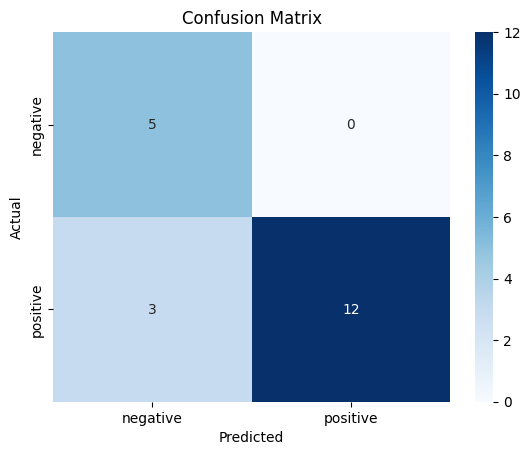

In [24]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()